# Exploring Insurance Dataset

In this notebook, I’ll load an insurance dataset from a CSV file and examine its structure. I'll use Python and the Pandas library for data manipulation, along with Matplotlib for basic data visualization.

This analysis will focus on examining how various factors impact the final insurance charges for individual policyholders.

## Importing Required Libraries

To begin, I’ll bring in the libraries necessary for our analysis. The Pandas library will help us handle tabular data efficiently, while Matplotlib will enable us to create insightful visualizations.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

To start, I’ll load the dataset into a Pandas DataFrame using the 'read_csv()' function. This involves providing the file path and specifying the delimiter used in the CSV file. To preview the dataset I’ll use the 'head()' method to display the first few rows, giving us an initial understanding of the data.


In [77]:
try:
    data = pd.read_csv('insurance.csv', delimiter=',')
except FileNotFoundError:
    print("File not found. Please check the file path.")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The dataset has information on individual medical insurance charges containing the following information:
- age: the age of the individual, in years
- sex: gender of the individual, "male" or "female"
- bmi: Body Madd Index (BMI) of the individual calculated in kg for weight and divided by squeared height in meters
- children: number of children per individual
- smoker: whether the individual is a smoker or not, "yes" or "no"
- region: which region the individual is from: "northeast", "northwest", "southeast" or "southwest"
- charges: the amount charged by the the insurance company for each individual

The first rows of the dataset show how the data and its variables are structured, it shows the range of values and potential patterns and outliers.


## Exploring data 

Now that the data is loaded, I'll start examining it.I am going to use the info() method to gather details about the dataset, including the number of rows and columns, as well as the data types of each column.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB




The dataset has 13338 rows and 7 columns. The columns data types are:
- age: int64 (1338 non-null) - a numeric variable indicating the age of the individual.
- sex: object (1338 non-null) - a binary categorical variable indicating the gender of the individual.
- bmi: float64 (1338 non-null) - a numeric variable indicating the body mass index of the individual.
- children: int64 (1338 non-null) - a categorical variable indicating the number of children the individual has.
- smoker: object (1338 non-null) - a binary categorical variable indicating whether the individual is a smoker or not.
- region: object (1338 non-null) - a categorical variable indicating the region of the individual's residence.
- charges: float64 (1338 non-null) - a numeric variable indicating the medical costs billed by the insurance company.
The "non-null" indicates that there are no missing values in the dataset.

Now I will use 'describe()' to get a summary of the numerical columns in the data frame.


In [12]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



The table above summarizes key statistics for each numerical column in the dataset, including the count, mean, standard deviation, minimum, and maximum values.

- Age: The age column ranges from 18 to 64 years, with an average age of 39.2 and a standard deviation of 14.05, indicating a diverse age distribution within the dataset.
- BMI: The BMI values range from 15.96 to 53.13, with a mean of 30.66 and a standard deviation of 6.10, suggesting a wide variation in body mass index across individuals.
- Children: The number of children varies from 0 to 5, with a mean of 1.09 and a standard deviation of 1.21, indicating most individuals have a relatively small number of children.
- Charges: The charges range from 1121.87 to 63770.43, with a mean of 13270.42 and a standard deviation of 12110.01, showing significant variation in healthcare charges across the dataset.
This statistical analysis gives us an overview of the data distribution, highlighting both the central tendency and the spread of values within each variable.

## Visualizing the data
Finally I will create visualization to get a better grasp and understanding of the data. 
First I will use a histogram to visualize the distribution of a numerical column.

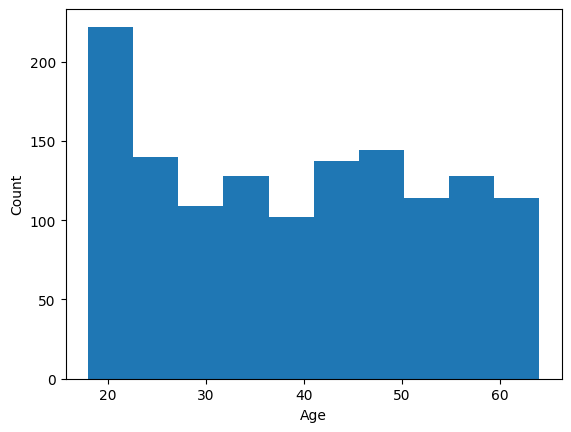

In [13]:
plt.hist(data['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The histogram above shows the distribution of the age column in the insurance dataset. The x-axis represents the different age ranges, while the y-axis shows the frequency of individuals in each range. The histogram is slightly skewed to the right, indicating that the dataset contains more individuals in their 20s and 30s than in their 60s. The majority of individuals fall within the 18-22 and 40-50 age ranges.

## Analysis of Insurance Dataset
In this section I will analyze the dataset as well as answer the following question:
- What is the average age of the patients in the dataset?
- Where do the majority of individuals in the dataset come from geographically?
- How do the insurance charges differ between smokers and non-smokers?
- What is the average age of individuals who have at least one child in the dataset?
  
By exploring these questions, I aim to uncover key insights that could help inform decisions about healthcare costs, risk factors and other demographic influences on insurance premiums.

## Average patient age
The average can be calculated by using 'mean()' on the age column

In [78]:
avg_age = data['age'].mean()

print('The average age of the patient is: {} years.'.format(round(avg_age, 2)))


The average age of the patient is: 39.21 years.


### Individuals by region
I will use a bar chart to show the number the individuals in each region, I will use 'value_counts()' to count the amount of individuals per region:

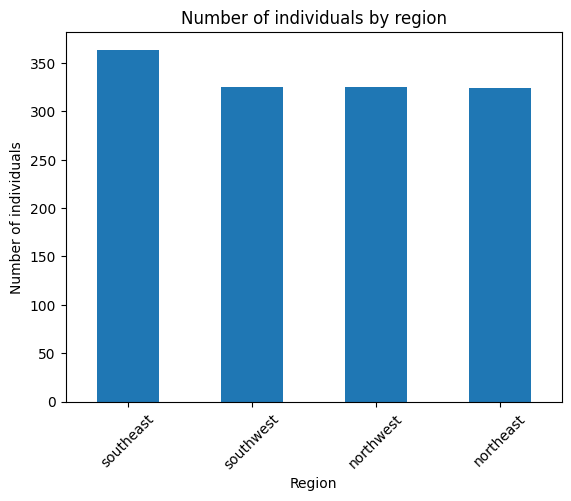

In [18]:
region_count = data['region'].value_counts()

# Bar chart
region_count.plot(kind='bar')
plt.title('Number of individuals by region')
plt.xlabel('Region')
plt.ylabel('Number of individuals')
plt.xticks(rotation=45)
plt.show()

The bar chart shows that most individuals are from the Southeast region.

### Difference between smokers vs. non-smokers
I will use 'groupby()' to separate individuals in smokers and non-smokers groups so I can calculate the average cost and compare the difference:

In [79]:
smoker_costs = data.groupby('smoker')['charges'].mean()

print('The average cost for smokers is: ', round(smoker_costs.iloc[1], 2))
print('The average cost for non-smokers is: ', round(smoker_costs.iloc[0], 2))

The average cost for smokers is:  32050.23
The average cost for non-smokers is:  8434.27


The average cost for smokers is 32050.23 while the average cost of non-smokers is 8434.27. 

In [23]:
percentage_difference = ((smoker_costs.iloc[1] - smoker_costs.iloc[0]) / smoker_costs.iloc[0]) * 100
print(f"Insurance for smokers is {round(percentage_difference, 2)}% more expensive than for non-smokers.") 

Insurance for smokers is 280.0% more expensive than for non-smokers.


### Average age for individual with children
I will create a new data frame containing only individuals with children and then find the average age of this group:

In [25]:
has_children_df = data[data['children'] > 0]

avg_age_has_children = data['age'].mean()

print(f'The average age of individuals with children is: {round(avg_age_has_children, 2)} years.')

The average age of individuals with children is: 39.21 years.


## Correlations 
In this section, I will study the correlations between different variables in the dataset. Specifically, I will focus on the correlations between:

- The individual's BMI
- The number of children the individual has
- The individual's age
- Smoker vs. non-smoker.


### Correlation between BMI and Charges
To analyze the relationship between BMI and insurance charges in the dataset I will start by calculation some statistical measures and then visualize the data.



In [80]:
bmi_charge_correlation = data['bmi'].corr(data['charges'])
print(f"The correlation between BMI and insurance charges is: {bmi_charge_correlation:.2f}")

The correlation between BMI and insurance charges is: 0.20


This indicates that there is a correlation between both variables but is not strong (a value close to 1 indicates a strong positive relationship)

A good way to understand the relationship is to plot the data. I will use a scatter plot to visually see how the insurance charges change with BMI.

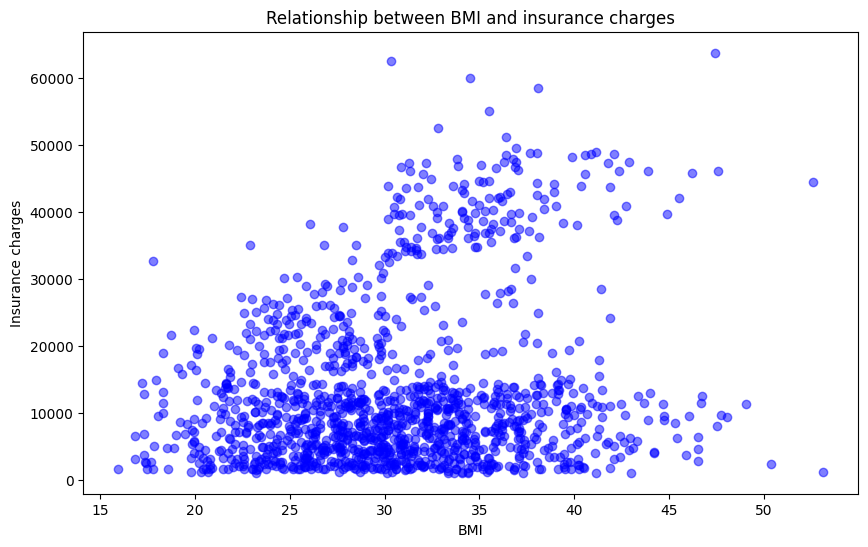

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(data['bmi'], data['charges'], alpha=0.5, color='blue')
plt.title('Relationship between BMI and insurance charges')
plt.xlabel('BMI')
plt.ylabel('Insurance charges')
plt.show()


To see the trend more clearly, I will fit a linear regression line to the data using seaborn. This will help you see the trend more clearly.

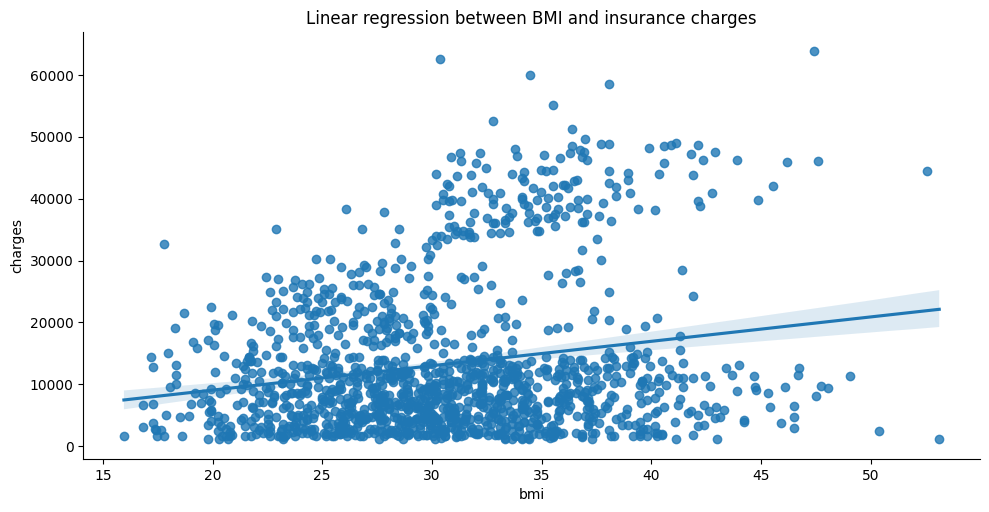

In [31]:
sns.lmplot(x='bmi', y='charges', data=data, aspect=2, height=5)
plt.title('Linear regression between BMI and insurance charges')
plt.show()

This scatterplot with a regression line and a shaded confidence interval, shows the relationship between BMI (x-axis) and insurance charges (y-axis). Some important points:
- The regression line slopes upward slightly, consistent with the weak positive correlation (0.20). This confirms that higher BMIs are somewhat associated with higher insurance charges, but the relationship is not strong.
- The data points are widely spread, especially for charges above 10,000. This indicates that many factors beyond BMI are influencing insurance charges.
- Some points (e.g., in the top-right corner) represent unusually high charges, which could affect the overall trend.

### Correlation between children and charges
To determine if the number of children affects insurance charges, I will analyze the relationship between the children column and the charges column in the insurance.csv dataset.

In [90]:
children_charges_correlation = data['children'].corr(data['charges'])
print(f"Correlation between children and charges: {children_charges_correlation}")

Correlation between children and charges: 0.06799822684790487


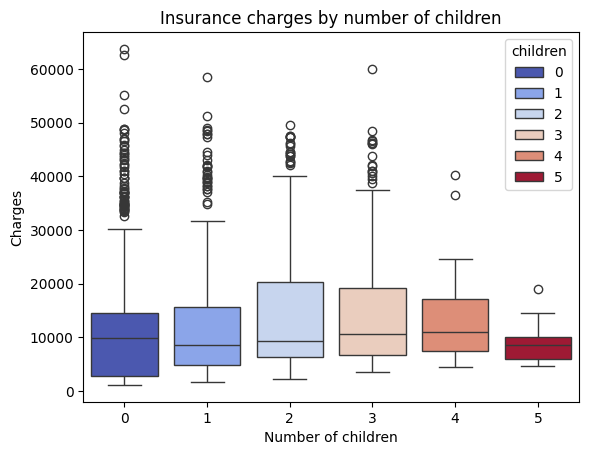

In [86]:
sns.boxplot(x='children', y='charges', hue='children', data=data, palette='coolwarm')
plt.title('Insurance charges by number of children')
plt.xlabel('Number of children')
plt.ylabel('Charges')
plt.show()

The box plot comparing charges to the number of children shows a general trend where individuals with more children tend to have higher charges. As the number of children increases, both the median charge and the overall range of charges (indicated by the increasing height of the boxes and the length of the whiskers) also increase. However, there is considerable overlap in the charges between the different groupings and considerable variation in the charges within each group. This suggests that while there is some correlation between the number of children and charges, the relationship is not very strong (0.06), suggesting that other factors are likely to play a more significant role in determining insurance charges.

### Correlation between age and charges 
To examine the correlation between age and insurance charges I will analyze how charges change as age increases. It would be expected that age could influence insurance costs due to the higher likelihood of health issues as individuals get older.
I will use a scatterplot to visualize any linear relationship between age and charges, and it will show if there are any outliers that need further investigation.

In [98]:
age_charges_correlation = data['age'].corr(data['charges'])
print(f"Correlation between age and charges: {age_charges_correlation}")

Correlation between age and charges: 0.29900819333064765


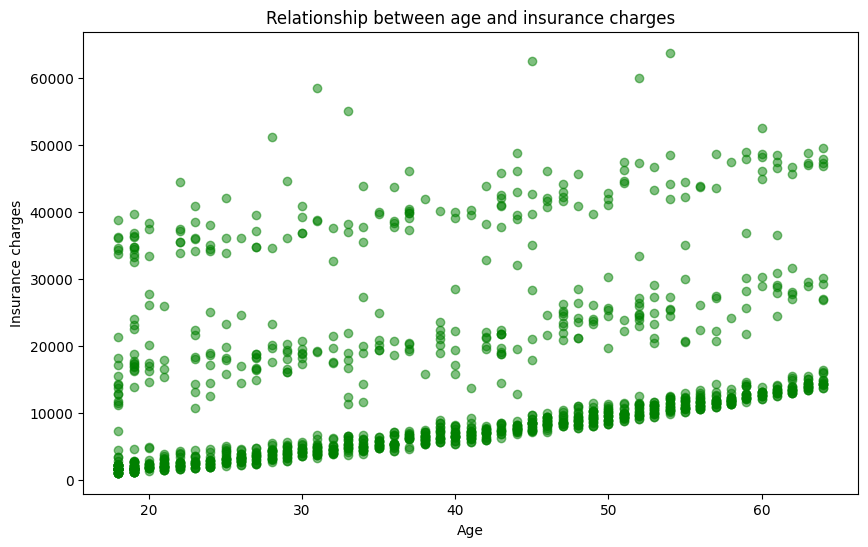

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['charges'], alpha=0.5, color='green')
plt.title('Relationship between age and insurance charges')
plt.xlabel('Age')
plt.ylabel('Insurance charges')
plt.show()

The scatter plot illustrates the relationship between age and medical charges, revealing a positive correlation with a correlation coefficient of 0.29. This suggests that, generally, as age increases, so do the medical charges. While there are a few outliers—some individuals in their 20s and 30s with charges higher than average, and some older individuals with charges lower than expected—most of the data points fall within a more predictable pattern. Additionally, there is a noticeable concentration of younger individuals in the dataset with relatively low charges. Overall, the plot reinforces the idea that age is an important factor influencing medical charges, although the correlation is moderate.

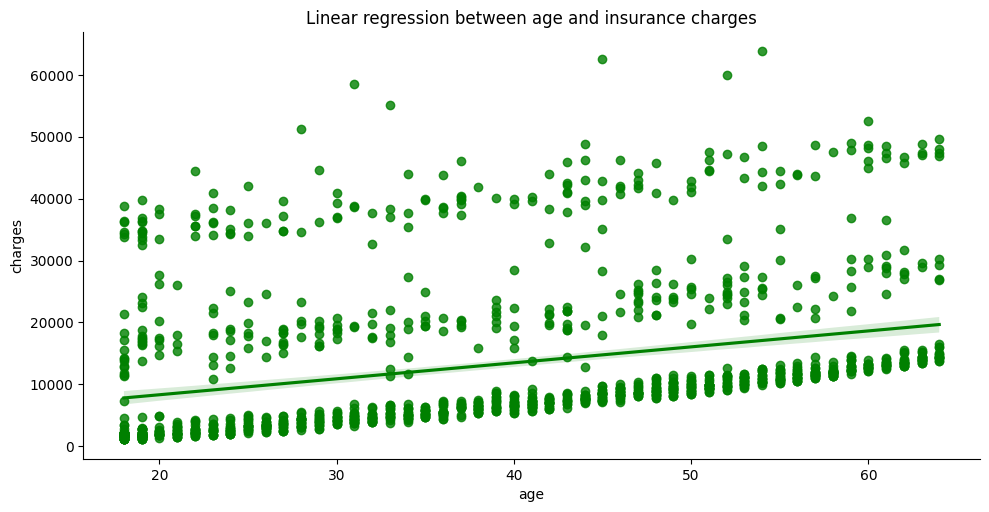

In [106]:
sns.lmplot(x='age', y='charges', data=data, aspect=2, height=5, scatter_kws={'color': 'green'}, line_kws={'color': 'green'})
plt.title('Linear regression between age and insurance charges')
plt.show()

The linear regression analysis of age and insurance charges indicates that there is a moderate positive relationship between the two variables. The regression model suggests that as age increases, the insurance charges tend to rise as well, though the relationship is not perfectly linear. The slope of the regression line provides insight into the rate of increase in charges per year of age. However, since the correlation coefficient is 0.29, this implies that age alone explains only a small portion of the variation in insurance charges, and other factors likely play a more significant role in determining an individual’s charges.

### Correlation between smokers vs. non-smokers

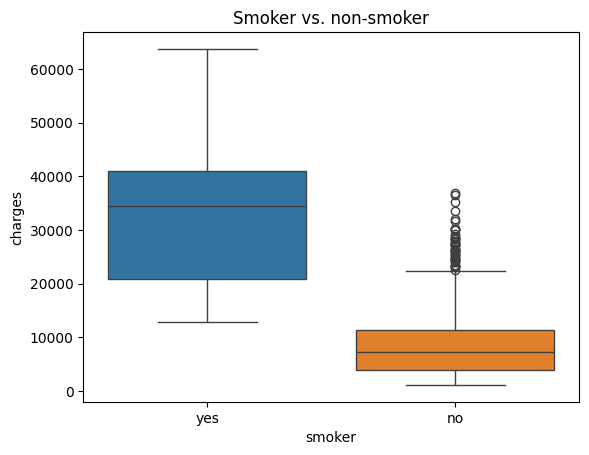

In [92]:
sns.boxplot(x='smoker', y='charges', data=data, hue='smoker')
plt.title('Smoker vs. non-smoker')
plt.show()

The data clearly show a strong relationship between smoking and insurance charges. Smokers have a significantly higher median charge than non-smokers, with many more outliers in the smoking group.

Looking at the box plot, we can see that the median charge for smokers is above 20,000, while for non-smokers it is below 10,000. This indicates that smokers generally have much higher medical costs than non-smokers. In addition, the smoking group has a higher number of extreme values, suggesting that some individuals in this group have exceptionally high medical costs.

As we have previously observed, smoking increases the cost of an insurance policy by around 280%, further emphasising the strong link between smoking and higher medical costs.

## Closing exploratory analysis
In this analysis, we conducted a comprehensive exploratory data analysis (EDA) on the insurance dataset, which provided valuable insights into the relationships between various factors such as age, gender, BMI, number of children, smoking status, region and medical costs. Through statistical summaries and visualisations, I identified key patterns, such as the positive correlation between age and medical charges, and the significant impact of smoking on insurance costs. We also highlighted areas of variability and outliers, suggesting that variables other than those initially considered may also influence charges.


## Data for inferential analysis and potential biases
For inferential analysis, the dataset has several key variables that can be further analysed to draw conclusions and make predictions about insurance premiums. These include numerical factors such as age, BMI and premiums, and categorical factors such as gender, smoking status and region. 
However, it is important to recognise potential sources of bias that may affect the significance and transferability of our findings:
- Geographical bias, due to limited regional data, could distort conclusions if applied outside the four US regions represented
- Sampling and self-selection bias may mean that the dataset is not fully representative of the broader population, excluding uninsured individuals and possibly overrepresenting certain groups.
- Reporting bias due to self-reporting adds another layer of uncertainty.
These biases should be taken into account when interpreting any conclusions drawn from the dataset.

## Conclusion
In conclusion, while the exploratory and inferential analyses provided valuable insights into the factors affecting medical charges, the limitations and potential biases in the dataset must be considered. As I move forward with further analysis or predictive modeling, it will be important to acknowledge these constraints to ensure any conclusions or recommendations are both valid and applicable in broader contexts.